## __Lab-6 Assignment__ Logistic Regression

## Foundation of ML

## __Om Patel__ 8958837

### ✨ **Info about Notebook...**

In this lab, we're diving into a lab exercise focused on logistic regression using the [Iris](https://www.kaggle.com/datasets/uciml/iris) dataset. Our goal is to build a model that can classify Iris flowers into two categories: virginica and non-virginica, based on certain measurements.

Compose your analysis following the steps of the machine learning workflow. The target reader is a product manager (PM) who is not proficient with the ML model, but is a key decision maker of whether to implement the solution. So the text should be clear to such a person in a way that allow them to make the call, together with you.

[More info about Iris Dataset.](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

### 🎯 **Goal:** The goal is to classify the species of an Iris flower given the dimensions of parts of the flower. The classification is binary, there are two classes: ***virginica*** and ***non-virginica***.

### 🪜 ***Key Steps To Perform:***

**1. Data Exploration:**
- Descriptive statistics revealed distinct characteristics for each species, particularly in petal length and width.
- Histograms visualized data distribution and class separation.
- Correlation matrix showed moderate to weak feature relationships.
- Additional insights included pair plots and distribution comparisons.

**2. Model Training and Evaluation:**
- Four models with 1, 2, 3, and 4 features were trained and evaluated on validation and test sets.
- Prediction tables per model showcased individual instance predictions and probabilities.
- A single-number metric (e.g., accuracy or F1 score) summarized each model's performance.

**3. Decision Boundary Plots:**
- Plots for 1, 2, and 3 feature models visualized the classification boundaries in feature space.
- These plots, along with validation data points, helped understand model decision logic.

**4. Failure Modes and Model Recommendation:**
- Analysis of incorrect predictions identified failure patterns and areas for improvement.
- Based on validation and test set performance, the best model was recommended, considering its complexity and trade-offs.

------------------------

#### 🛠️ Data Loading and **Preprocessing**:
Loading the Iris Dataset and redefining the target variable into two classes: virginica and non-virginica.

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
iris_odf = load_iris()
display(iris_odf.data.shape)
display(iris_odf.target.shape)

(150, 4)

(150,)

In [4]:
print(iris_odf)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
iris_odf.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris_odf.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# dividing the data into 2 sections instade of 3.
X, y_main = iris_odf.data, iris_odf.target
y = (y_main == 2)   # here 2 means the class of Virginica
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [54]:
print(y)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


Hence, the target variable is devided into 2 different Classes. Virginica is represented as True and NonVirginica is represented as False.

### 🪅 **Data Exploration:**
Lets perform all the task which we have mentained above for the Data Exploration.

In [55]:
stats_df = pd.DataFrame(X, y, columns=iris_odf.feature_names)
stats_df['target'] = y
stats = stats_df.describe()

In [56]:
stats_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
False,5.1,3.5,1.4,0.2,False
False,4.9,3.0,1.4,0.2,False
False,4.7,3.2,1.3,0.2,False
False,4.6,3.1,1.5,0.2,False
False,5.0,3.6,1.4,0.2,False
...,...,...,...,...,...
True,6.7,3.0,5.2,2.3,True
True,6.3,2.5,5.0,1.9,True
True,6.5,3.0,5.2,2.0,True
True,6.2,3.4,5.4,2.3,True


In [57]:
stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
# descriptive statistics
grouped = stats_df.groupby('target').describe()
grouped

sepal length (cm)                                               
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
False              100.0  5.471  0.641698  4.3  5.000  5.4  5.9  7.0  \
True                50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)   
                  count   mean  ...               75%  max            count   
target                          ...                                           
False             100.0  3.099  ...             4.325  5.1            100.0  \
True               50.0  2.974  ...             5.875  6.9             50.0   

                                                  
         mean       std  min  25%  50%  75%  max  
target                                            
False   0.786  0.565153  0.1  0.2  0.8  1.3  1.8  
True    2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[2 rows x 32 columns]

Now, lets make histograms with each fvature for each class.

Our task is to make histogram per feature, for each of the two classes. 

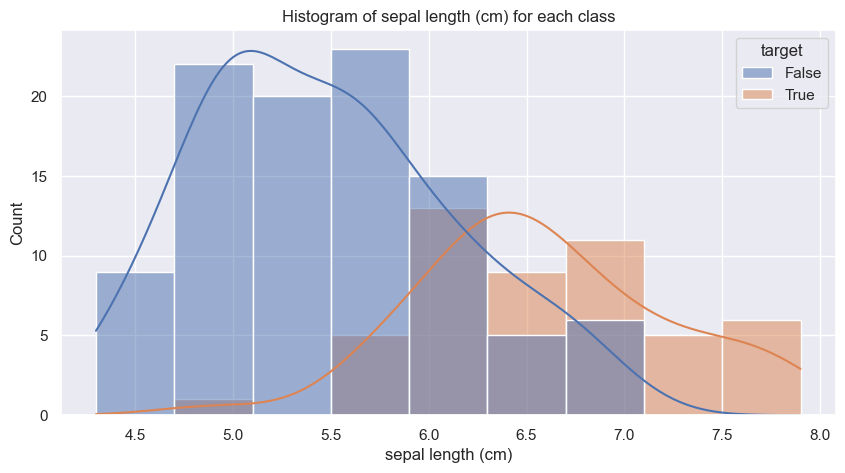

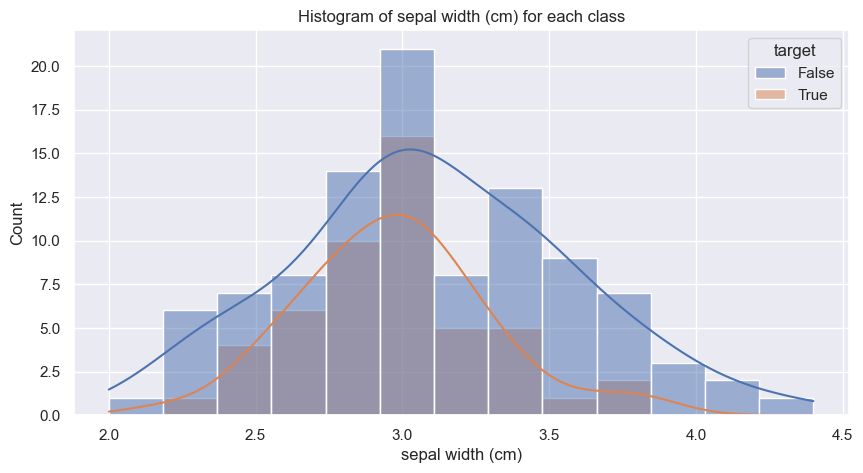

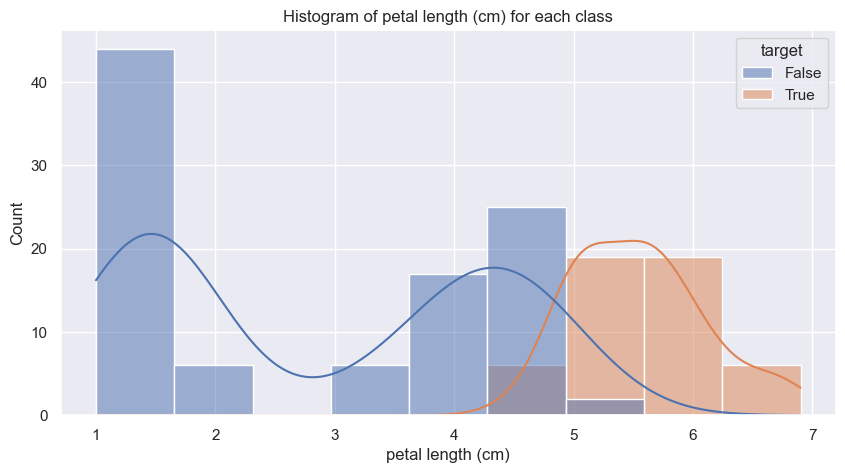

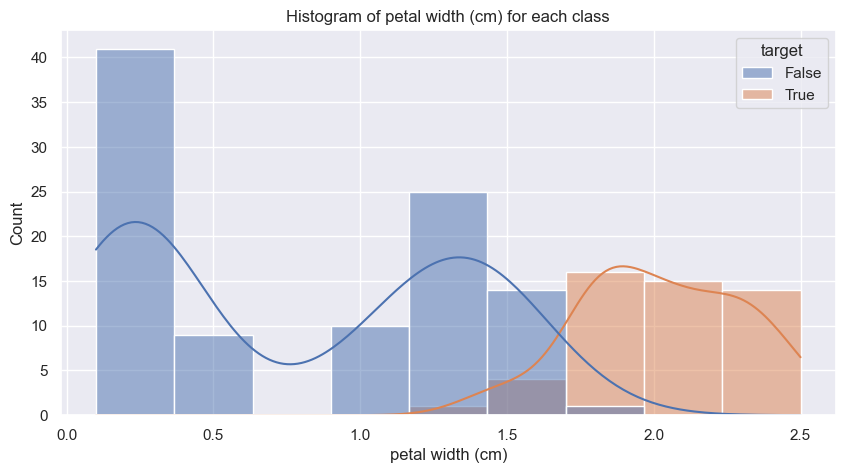

In [86]:
sns.set(style="darkgrid")
for feature in iris_odf.feature_names:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=stats_df, x=feature, hue='target', kde=True)
    plt.title(f'Histogram of {feature} for each class')
    plt.show()

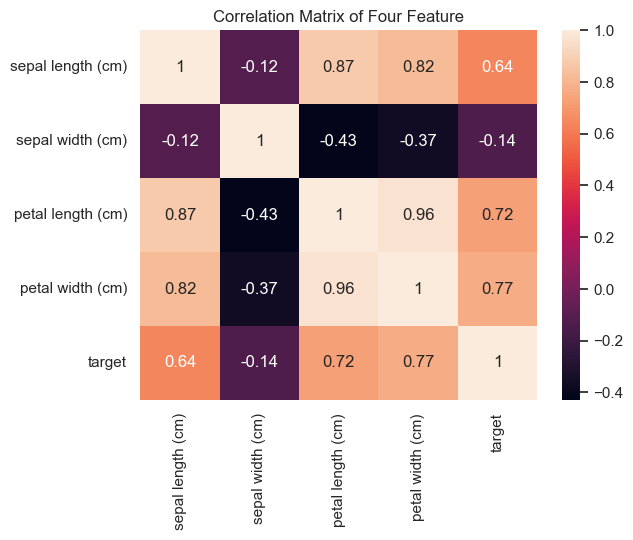

In [85]:
# correlation
cory_matx = stats_df.corr()
sns.heatmap(cory_matx, annot=True)
plt.title('Correlation Matrix of Four Feature')
plt.show()

Now Following are three new graphs to represent relationship.

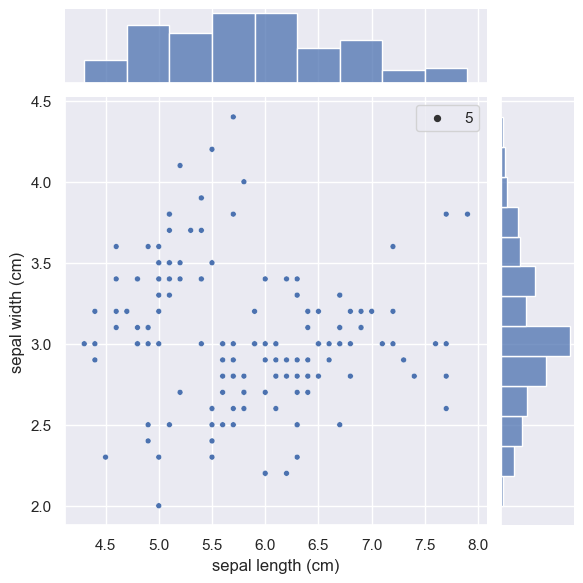

In [104]:
# join plot
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=stats_df, size=5) # from kaggle https://www.kaggle.com/code/palak98039/python-data-visualizations

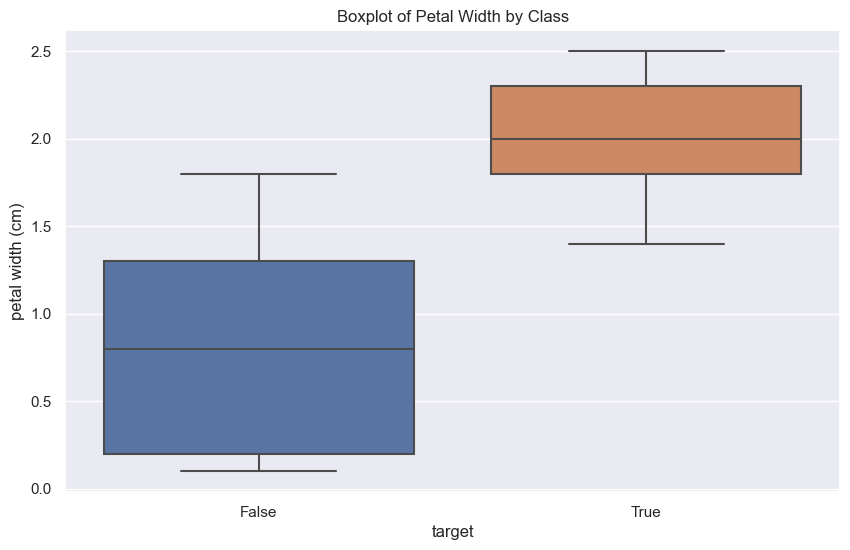

In [69]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='petal width (cm)', data=stats_df)
plt.title('Boxplot of Petal Width by Class')
plt.show()

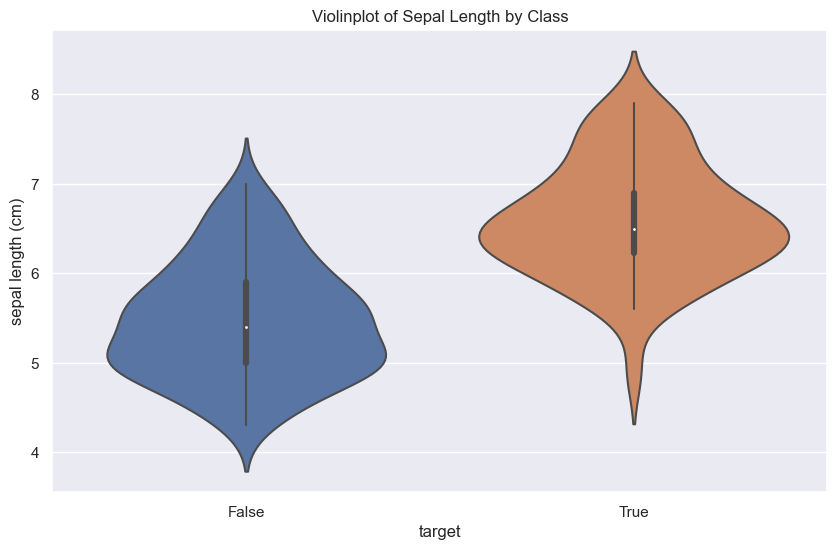

In [68]:
# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='sepal length (cm)', data=stats_df)
plt.title('Violinplot of Sepal Length by Class')
plt.show()

Following are insights
- From the above graph we can see that Pelat Width is much higher in Virginica flower type then other types.
- There is a strong corelation between Petal Length and Petal Width (96%)
- amount of observations about the non Virginica are much more higher then Virginica.

Spliting the dataset

In [111]:
X_train, X_new, y_train, y_new = train_test_split(X, y, test_size=0.2, random_state=33)
X_val, X_test, y_val, y_test = train_test_split(X_new, y_new, test_size=0.5, random_state=21)

In [112]:
X_train = pd.DataFrame(X_train, columns=iris_odf.feature_names)
X_val = pd.DataFrame(X_val, columns=iris_odf.feature_names)
X_test = pd.DataFrame(X_test, columns=iris_odf.feature_names)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.6,2.7,4.2,1.3
1,6.7,3.1,4.7,1.5
2,5.6,2.8,4.9,2.0
3,6.4,3.2,5.3,2.3
4,6.7,3.1,5.6,2.4
...,...,...,...,...
115,4.9,2.4,3.3,1.0
116,6.3,2.5,5.0,1.9
117,5.6,3.0,4.5,1.5
118,7.7,3.0,6.1,2.3


In [113]:
y_train = pd.DataFrame(y_train, columns=['target'])
y_val = pd.DataFrame(y_val, columns=['target'])
y_test = pd.DataFrame(y_test, columns=['target'])
y_train

,target
0,False
1,False
2,True
3,True
4,True
...,...
115,False
116,True
117,False
118,True


Logistic Regression 

In [114]:
# model 1
model_1_var = LogisticRegression()
model_1_var.fit(X_train[['sepal length (cm)']], y_train['target'])

LogisticRegression()

In [115]:
# model 2
model_2_var = LogisticRegression()
model_2_var.fit(X_train[['sepal width (cm)', 'sepal length (cm)']], y_train['target'])

LogisticRegression()

In [116]:
# model 3
model_3_var = LogisticRegression()
model_3_var.fit(X_train[['petal length (cm)', 'sepal width (cm)', 'sepal length (cm)']], y_train['target'])

LogisticRegression()

In [117]:
# model 4
model_4_var = LogisticRegression()
model_4_var.fit(X_train[['petal width (cm)', 'petal length (cm)', 'sepal width (cm)', 'sepal length (cm)']], y_train['target'])

LogisticRegression()

Mode evaluation: 

In [120]:
result_of_model1 = pd.DataFrame({ "No": range(1,len(X_val)+1),
                                "Probablity": (model_1_var.predict_proba(X_val[['sepal length (cm)']])[:,1]*100),
                                "Predict": model_1_var.predict(X_val[['sepal length (cm)']]),
                                "Actual Value": y_val['target']
})

In [121]:
result_of_model1

,No,Probablity,Predict,Actual Value
0,1,34.449065,False,False
1,2,25.542379,False,True
2,3,44.601127,False,True
3,4,74.323221,True,True
4,5,49.911816,False,True
5,6,70.047560,True,True
6,7,7.157123,False,False
7,8,2.585228,False,False
8,9,55.224495,True,False
9,10,39.410893,False,True


In [122]:
result_of_model2 = pd.DataFrame({ "No": range(1,len(X_val)+1),
                                "Probablity": (model_2_var.predict_proba(X_val[['sepal width (cm)', 'sepal length (cm)']])[:,1]*100),
                                "Predict": model_2_var.predict(X_val[['sepal width (cm)', 'sepal length (cm)']]),
                                "Actual Value": y_val['target']
})

In [123]:
result_of_model2

,No,Probablity,Predict,Actual Value
0,1,35.059056,False,False
1,2,25.186872,False,True
2,3,39.453895,False,True
3,4,72.877297,True,True
4,5,48.155752,False,True
5,6,67.450276,True,True
6,7,5.665373,False,False
7,8,2.336993,False,False
8,9,56.970939,True,False
9,10,41.176830,False,True


In [124]:
result_of_model3 = pd.DataFrame({ "No": range(1,len(X_val)+1),
                                "Probablity": (model_3_var.predict_proba(X_val[['petal length (cm)', 'sepal width (cm)', 'sepal length (cm)']])[:,1]*100),
                                "Predict": model_3_var.predict(X_val[['petal length (cm)', 'sepal width (cm)', 'sepal length (cm)']]),
                                "Actual Value": y_val['target']
})

In [125]:
result_of_model3

,No,Probablity,Predict,Actual Value
0,1,33.157619,False,False
1,2,67.171336,True,True
2,3,90.042248,True,True
3,4,57.979446,True,True
4,5,86.609528,True,True
5,6,95.503231,True,True
6,7,0.001261,False,False
7,8,0.002230,False,False
8,9,23.542218,False,False
9,10,40.456766,False,True


In [126]:
result_of_model4 = pd.DataFrame({ "No": range(1,len(X_val)+1),
                                "Probablity": (model_4_var.predict_proba(X_val[['petal width (cm)', 'petal length (cm)', 'sepal width (cm)', 'sepal length (cm)']])[:,1]*100),
                                "Predict": model_4_var.predict(X_val[['petal width (cm)', 'petal length (cm)', 'sepal width (cm)', 'sepal length (cm)']]),
                                "Actual Value": y_val['target']
})

In [127]:
result_of_model4

,No,Probablity,Predict,Actual Value
0,1,22.686228,False,False
1,2,67.329769,True,True
2,3,95.756182,True,True
3,4,82.117441,True,True
4,5,83.147130,True,True
5,6,97.346888,True,True
6,7,0.000527,False,False
7,8,0.000861,False,False
8,9,20.702623,False,False
9,10,48.085696,False,True


So, From among all 3 models, I would choose the 3 model because most of its prediction for the validation part is right and accurate. Meaning that Model trained on `'petal length (cm)', 'sepal width (cm)', 'sepal length (cm)'` these variables tend to perform better then others.